# Logistics Regression,Machine Learning

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble,discriminant_analysis, gaussian_process

In [4]:
#Reading DataFrame.
Data=pd.read_csv('Desktop/EEG0.csv')
Data = Data[Data.Activity_Name!='Light Ambulatory']
Data.head(10)

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Activity_Name
0,139559,45567,8773,17471,24624,6556,2584,11550,Stationary
1,444535,99703,5699,22056,43233,5919,5422,11393,Stationary
2,194551,135641,22018,21954,26301,6838,5853,18788,Stationary
3,44358,65511,4610,1958,3623,10555,5731,9016,Stationary
4,35560,14786,1089,4297,4020,1390,2699,3831,Stationary
5,102978,39628,1795,2808,4602,4356,1209,2812,Stationary
6,612375,100998,19267,18902,15198,21613,9529,12111,Stationary
7,100102,9309,7601,3599,2605,4976,1271,4491,Stationary
8,4043,21502,2852,929,3216,2895,1221,698,Stationary
9,1392195,201865,32314,19425,12570,10177,5614,4414,Stationary


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7080 entries, 0 to 8159
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Delta         7080 non-null   int64 
 1    Theta         7080 non-null   int64 
 2    Alpha1        7080 non-null   int64 
 3    Alpha2        7080 non-null   int64 
 4    Beta1         7080 non-null   int64 
 5    Beta2         7080 non-null   int64 
 6    Gamma1        7080 non-null   int64 
 7    Gamma2        7080 non-null   int64 
 8   Activity_Name  7080 non-null   object
dtypes: int64(8), object(1)
memory usage: 553.1+ KB


In [6]:
Data['Activity_Name'].unique()

array(['Stationary', 'Intense Ambulatory'], dtype=object)

# EDA-- Exploratory Data Analysis

In [7]:
#Data unique values
Data.nunique()

 Delta           6203
 Theta           6136
 Alpha1          5898
 Alpha2          5816
 Beta1           5830
 Beta2           5809
 Gamma1          5441
 Gamma2          4666
Activity_Name       2
dtype: int64

In [8]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [9]:
Data.dropna(inplace=True)

In [10]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

# Label Encoder

In [11]:
LabelEncoder = preprocessing.LabelEncoder()

In [12]:
Data['Activity_Name'] = LabelEncoder.fit_transform(Data['Activity_Name'].astype(str))

In [13]:
X = Data.drop(['Activity_Name'],axis=1)
Y = Data['Activity_Name']
Data['Activity_Name'].unique()

array([1, 0])

<AxesSubplot:>

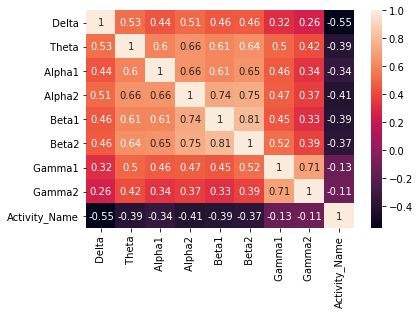

In [14]:
corelation=Data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [15]:
m=len(X)
m

7080

In [16]:
X.shape

(7080, 8)

In [17]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)

In [18]:
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)

# Independent Variable X

In [19]:
X

array([[-0.58991066, -0.38237424, -0.40595261, ..., -0.40084268,
        -0.58687875,  0.52077846],
       [-0.10156177, -0.14839323, -0.44578682, ..., -0.41053946,
        -0.43899981,  0.50649347],
       [-0.50185362,  0.00693427, -0.23431819, ..., -0.39654992,
        -0.41654181,  1.17934362],
       ...,
       [-0.6962638 , -0.39399635, -0.3572937 , ..., -0.35284591,
        -0.64258086, -0.38845637],
       [-0.77756988, -0.54961343, -0.3455404 , ..., -0.39081101,
        -0.47396344, -0.05389654],
       [-0.81338228, -0.5793192 , -0.51963692, ..., -0.50064187,
        -0.72152258, -0.5301234 ]])

# Dependent Variable Y

In [20]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7075    1
7076    1
7077    1
7078    1
8159    1
Name: Activity_Name, Length: 7080, dtype: int32

In [21]:
Model=LogisticRegression()

In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7080 entries, 0 to 8159
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0    Delta         7080 non-null   int64
 1    Theta         7080 non-null   int64
 2    Alpha1        7080 non-null   int64
 3    Alpha2        7080 non-null   int64
 4    Beta1         7080 non-null   int64
 5    Beta2         7080 non-null   int64
 6    Gamma1        7080 non-null   int64
 7    Gamma2        7080 non-null   int64
 8   Activity_Name  7080 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 525.5 KB


<AxesSubplot:>

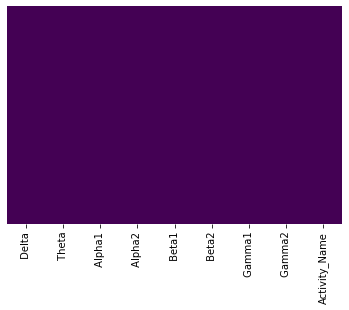

In [23]:
sns.heatmap(Data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<AxesSubplot:>

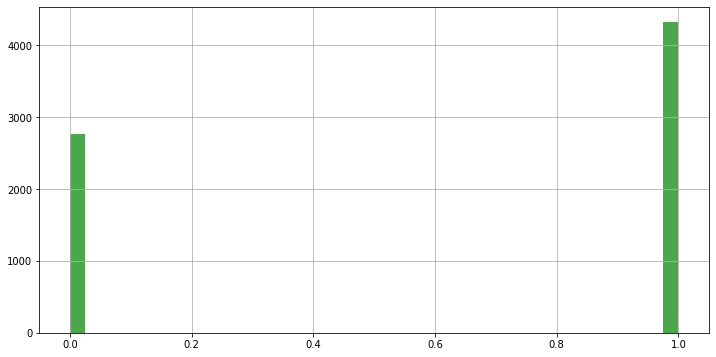

In [24]:
Data['Activity_Name'].hist(bins=40,color="green",alpha=0.7,figsize=(12,6))

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


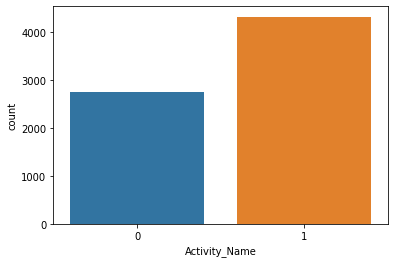

In [25]:
sns.countplot(Data['Activity_Name'],label="count")
plt.show()

In [26]:
from matplotlib import cm

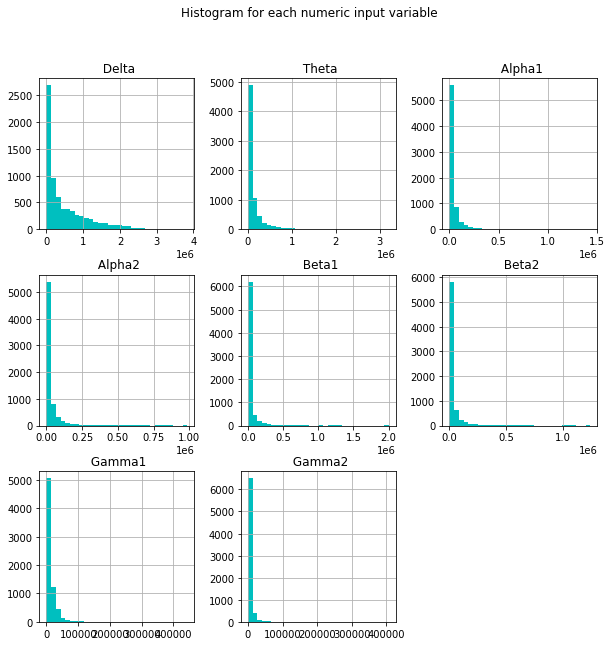

In [27]:
import pylab as pl

# To create a histogram, we will use pandas hist() method.
Data.drop('Activity_Name', axis=1).hist(bins=30, figsize=(10,10), color = "c")
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Data_histogram')
plt.show()

In [28]:
np.any(np.isnan(X))

False

In [29]:
np.all(np.isfinite(X))

True

In [30]:
X.shape

(7080, 8)

In [31]:
Y.shape

(7080,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [33]:
fitting=Model.fit(X_train,y_train)

In [34]:
Y_prediction=Model.predict(X_test)

In [35]:
Y_prediction

array([1, 0, 0, ..., 1, 1, 1])

# Accuracy of Model=Logistic Regression

In [36]:
acc_score = round(accuracy_score(y_test, Y_prediction)*100,2)
print(acc_score,'% Accuracy')

84.39 % Accuracy


# Classification Report

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.69      0.76       524
           1       0.84      0.94      0.88       892

    accuracy                           0.84      1416
   macro avg       0.85      0.81      0.82      1416
weighted avg       0.85      0.84      0.84      1416



# Support Vector Machine, SVM

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn import svm

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [42]:
X_train

array([[-0.57769937, -0.2149319 , -0.38991007, ..., -0.42874566,
        -0.66264196, -0.39518942],
       [ 0.02143017, -0.40565305, -0.45199391, ..., -0.43105949,
        -0.64049659, -0.41538858],
       [-0.40300083, -0.48396079, -0.29373259, ..., -0.41355353,
        -0.52226639, -0.43849932],
       ...,
       [ 0.18799747, -0.06833936,  0.68216686, ..., -0.28196961,
        -0.37761807,  0.19040403],
       [ 0.4329181 ,  1.19794412,  1.8340418 , ...,  0.11208192,
         0.18508266, -0.11358412],
       [-0.36986415,  0.92105766,  0.34159337, ..., -0.28326353,
        -0.48157102, -0.24988291]])

In [43]:
y_train

6159    1
389     1
3112    0
2036    0
4835    0
       ..
1321    1
5611    1
523     1
5452    1
7072    1
Name: Activity_Name, Length: 5664, dtype: int32

In [44]:
model=svm.SVC()

# Hyperparameter tunning-Grid Search 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'kernel':('linear', 'rbf'), 'C':[10, 20,30,40,50]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
GridSearchCV(estimator=svc,
             param_grid={'C': [10, 20,30,40,50], 'kernel': ('linear', 'rbf')},cv=5,return_train_score=False)
#clf.cv_results_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 20, 30, 40, 50],
                         'kernel': ('linear', 'rbf')})

In [47]:
df=pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.846571
1,10,rbf,0.884357
2,20,linear,0.846924
3,20,rbf,0.884357
4,30,linear,0.846924
5,30,rbf,0.886123
6,40,linear,0.846924
7,40,rbf,0.887535
8,50,linear,0.846924
9,50,rbf,0.887535


In [48]:
#dir(clf)

In [49]:
clf.best_score_*100

88.75350472026172

In [50]:
clf.best_params_

{'C': 50, 'kernel': 'rbf'}

In [51]:
model.fit(X_train,y_train)

SVC()

In [52]:
prediction=model.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 0, 1])

In [53]:
y_test

3837    1
4100    0
6242    1
4714    0
5128    0
       ..
3995    1
6806    1
6480    1
4492    0
5971    1
Name: Activity_Name, Length: 1416, dtype: int32

# Accuracy of Model SVM=Support Vector Machine

In [54]:
acc_score = round(accuracy_score(y_test, prediction)*100,2)
print(acc_score,'% Accuracy')

89.34 % Accuracy


In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       550
           1       0.88      0.95      0.92       866

    accuracy                           0.89      1416
   macro avg       0.90      0.88      0.89      1416
weighted avg       0.89      0.89      0.89      1416



# K-Nearest-Neighbour, Machine Learning

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [58]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

# Accuracy on training Data

In [59]:
KNN.score(X_train,y_train)*100

90.48375706214689

# Accuracy on Testing Data

In [60]:
KNN.score(X_test,y_test)*100

88.2768361581921

In [61]:
prediction=model.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 0, 1])

In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       550
           1       0.88      0.95      0.92       866

    accuracy                           0.89      1416
   macro avg       0.90      0.88      0.89      1416
weighted avg       0.89      0.89      0.89      1416



# Navie Bayes, Machine Learning Model

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()

In [65]:
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [67]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       550
           1       0.88      0.95      0.92       866

    accuracy                           0.89      1416
   macro avg       0.90      0.88      0.89      1416
weighted avg       0.89      0.89      0.89      1416



# Accuracy Score

In [68]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 79.0960


In [69]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[291, 259],
       [ 37, 829]], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[291 259]
 [ 37 829]]

True Positives(TP) =  291

True Negatives(TN) =  829

False Positives(FP) =  259

False Negatives(FN) =  37


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10,random_state=0)
# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [80]:
y_pred = rfc.predict(X_test)

# Random Forest Accuracy

In [81]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with 10 decision-trees : 89.5480


# Decision Tree

In [82]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [83]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [85]:
y_pred_gini = clf_gini.predict(X_test)

In [91]:
y_pred_gini1= clf_gini.predict(X_train)

In [87]:
#testing accuracy
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)*100))

Model accuracy score with criterion gini index: 85.2401


In [92]:
#training accuracy
print('Model accuracy score training  with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini1)*100))

Model accuracy score training  with criterion gini index: 83.8453


In [ ]:
#Roc and AUC 

In [101]:
MLA = [
   

    #Gaussian Processes
    
    #GLM
    linear_model.LogisticRegressionCV(),
    
   
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    svm.LinearSVC(),
    #decision tree
    tree.DecisionTreeClassifier(),
       ensemble.RandomForestClassifier(),

    
    ]

In [102]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
5,RandomForestClassifier,1.0000,0.9131,0.909592,0.952656,0.901782
2,KNeighborsClassifier,0.9048,0.8828,0.887168,0.926097,0.870321
4,DecisionTreeClassifier,1.0000,0.8609,0.882286,0.891455,0.852091
0,LogisticRegressionCV,0.8468,0.8460,0.833333,0.935335,0.820395
3,LinearSVC,0.8430,0.8446,0.826923,0.943418,0.816254
1,GaussianNB,0.7837,0.7910,0.761949,0.957275,0.743183


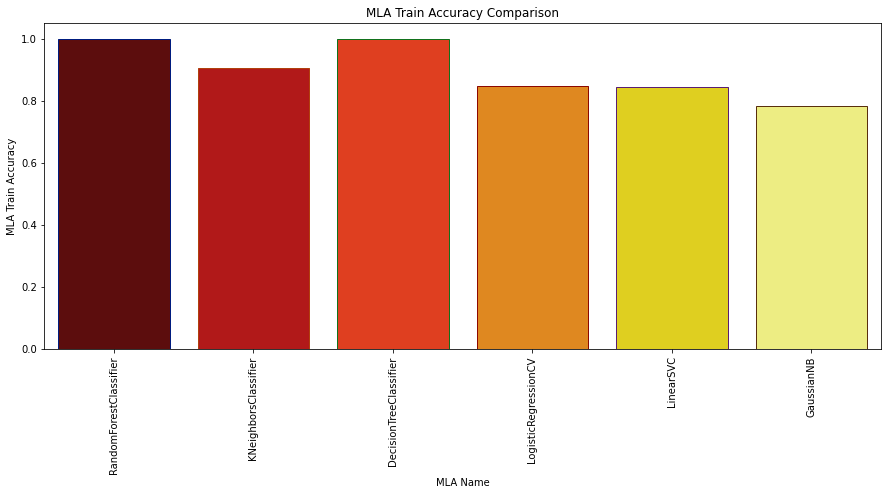

In [103]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

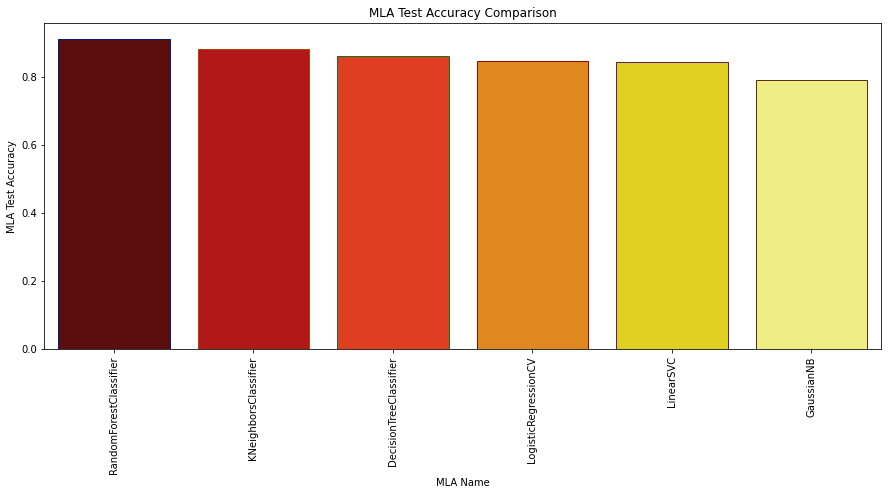

In [104]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()